In [129]:
import pandas as pd

<p><span style="color:#3498db"><span style="font-size:14px"><strong>загрузим данные и изучим их подробнее</strong></span></span></p>


In [130]:
file_path = 'C:\\Users\\USER\\Downloads\\тест антифрод\\Тестовое_задание_2_Антифрод_аналитик.xlsx'
df = pd.read_excel(file_path)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13575 entries, 0 to 13574
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Provider ID                13220 non-null  float64       
 1   Operation ID               13575 non-null  int64         
 2   Payment ID                 13575 non-null  object        
 3   Operation Type             13575 non-null  object        
 4   Operation Status           13575 non-null  object        
 5   Secure 3ds Check           1209 non-null   float64       
 6   Channel Amount             13572 non-null  float64       
 7   Channel Currency           13562 non-null  object        
 8   Operation created at Date  13575 non-null  datetime64[ns]
 9   Payment Method Type        13568 non-null  object        
 10  Account Number             13200 non-null  object        
 11  Merchant ID                13575 non-null  int64         
 12  Proj

In [132]:
df.head(5)

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
0,4781.0,99892010097211,6021093719,sale,success,1.0,1000.0,RUB,2022-03-30,visa,427626******5062,39,321,3753071,avtomr@yandex.ru,LEONID PROKHOROV,Russian Federation,Russian Federation,176.59.134.184,SBERBANK of Russia
1,1293.0,99888010096111,347788572,sale,success,NaN,51.0,EUR,2022-02-27,visa,434597******0730,1581,5771,95022,williahmalexdelaplaza@gmail.com,WILLIAHM ALEX DE LA PLAZA,Denmark,Denmark,62.198.132.139,Jyske Bank A/S
2,1293.0,99888010096101,347788572,sale,decline,NaN,51.0,EUR,2022-02-27,visa,434597******0730,1581,5771,95022,williahmalexdelaplaza@gmail.com,WILLIAHM ALEX DE LA PLAZA,Denmark,Denmark,62.198.132.139,Jyske Bank A/S
3,1293.0,99888010096091,347788572,sale,decline,NaN,51.0,EUR,2022-02-27,visa,434597******0730,1581,5771,95022,williahmalexdelaplaza@gmail.com,WILLIAHM ALEX DE LA PLAZA,Denmark,Denmark,62.198.132.139,Jyske Bank A/S
4,1293.0,99888010096081,347788572,sale,decline,NaN,51.0,EUR,2022-02-27,visa,434597******0730,1581,5771,95022,williahmalexdelaplaza@gmail.com,WILLIAHM ALEX DE LA PLAZA,Denmark,Denmark,62.198.132.139,Jyske Bank A/S


In [ ]:
filtered_df = df[df['Customer Email'] == 'quasar83@hotmail.it']

print(filtered_df)

<p><span style="color:#3498db"><span style="font-size:14px"><strong>изучим дубликаты и пропуски</strong></span></span></p>


In [133]:
duplicates = df[df.duplicated()]
num_duplicates = duplicates.shape[0]

if num_duplicates > 0:
    print(f"Найдено {num_duplicates} дубликатов в датасете.")
    print("Вот некоторые из дублирующихся строк:")
    print(duplicates)
else:
    print("Дубликатов в датасете не найдено.")

Дубликатов в датасете не найдено.


In [134]:
missing_values = df.isnull().sum()
print(missing_values)

Provider ID                    355
Operation ID                     0
Payment ID                       0
Operation Type                   0
Operation Status                 0
Secure 3ds Check             12366
Channel Amount                   3
Channel Currency                13
Operation created at Date        0
Payment Method Type              7
Account Number                 375
Merchant ID                      0
Project ID                       0
Customer ID                     33
Customer Email                1495
Card Holder                   1151
Issuer Country Name           1062
Country By IP Name              56
Customer IP V4 V6                0
Issuer Bank Name              1176
dtype: int64


In [191]:
project_id_counts = df['Project ID'].value_counts()
print("Уникальные значения и их количества в колонке 'Project ID':")
print(project_id_counts)

Уникальные значения и их количества в колонке 'Project ID':
Project ID
5771     2877
433      2672
321      2497
12571    2013
983      1538
22431     688
27361     231
26751     203
726       177
1098      158
162       123
10671      98
5741       61
46311      48
25211      36
27331      28
5591       27
18981      22
7551       18
30791      10
5761        9
43041       9
10551       5
40571       3
43031       3
28481       3
1222        2
12531       2
10691       1
Name: count, dtype: int64


<p><span style="color:#3498db"><span style="font-size:14px"><strong>изучим какой Merchant ID соверщает больше всего операций</strong></span></span></p>


In [135]:
most_common_merchant_id = df['Merchant ID'].value_counts().idxmax()
print (most_common_merchant_id)

1581


<p><span style="color:#3498db"><span style="font-size:14px"><strong>изучим какие операции и на какие суммы проводит этот Merchant ID</strong></span></span></p>


In [136]:
operations_count = df[df['Merchant ID'] == 1581]['Operation Type'].value_counts()
print (operations_count)

Operation Type
sale    2947
Name: count, dtype: int64


In [137]:
filtered_df = df[df['Merchant ID'] == 1581]
currency_operations = filtered_df['Channel Currency'].value_counts()
print(currency_operations)

Channel Currency
EUR    2289
USD     656
AUD       2
Name: count, dtype: int64


<p><span style="color:#3498db"><span style="font-size:14px"><strong>подозрения вызывают оплаты в валюте AUD, посмотрим на эти операции внимательнее</strong></span></span></p>

In [138]:
filtered_data = df[(df['Channel Currency'] == 'AUD') & (df['Merchant ID'] == 1581)]
print(filtered_data)

      Provider ID      Operation ID Payment ID Operation Type  \
4321          NaN  5047440010096662  348036368           sale   
6228       1299.0  5020574010095152  347615865           sale   

              Operation Status  Secure 3ds Check  Channel Amount  \
4321                   decline               NaN           41.55   
6228  awaiting redirect result               NaN          400.00   

     Channel Currency Operation created at Date Payment Method Type  \
4321              AUD                2022-02-28            unionpay   
6228              AUD                2022-02-27     cash/cashtocode   

        Account Number  Merchant ID  Project ID Customer ID  \
4321  621729******6435         1581        5771       13571   
6228               NaN         1581        5771       26477   

               Customer Email         Card Holder Issuer Country Name  \
4321  chrismersch@hotmail.com  CHRISTOPHER MERSCH                 NaN   
6228  lukemaybury@hotmail.com                 NaN

<p><span style="color:#3498db"><span style="font-size:14px"><strong>при проверке данных об оплате в валюте AUD аномалий не выявлено.
Посмотрми внимательнее на оплаты для Merchant ID 1581 по странам выпуска карты, IP адресу плательщика и валюте оплаты</strong></span></span></p>

In [139]:
df_filtered = df[df['Merchant ID'] == 1581]
issuer_countries = df_filtered['Issuer Country Name'].value_counts()
ip_countries = df_filtered['Country By IP Name'].value_counts()
channel_currencies = df_filtered['Channel Currency'].value_counts()
print (issuer_countries, ip_countries, channel_currencies)

Issuer Country Name
Norway                             547
Spain                              293
Australia                          280
Poland                             194
Canada                             188
Denmark                            181
Japan                              168
Sweden                             141
Germany                            122
Ireland                            118
Israel                              89
Italy                               64
Jordan                              54
Greece                              51
Mexico                              43
Romania                             41
Bulgaria                            40
Austria                             28
Belgium                             27
United States                       24
France                              23
Switzerland                         20
New Zealand                         20
Czech Republic                      20
United Kingdom                      18
Lithu

In [140]:
df_filtered = df[df['Merchant ID'] == 1581]

table = df_filtered.groupby(['Issuer Country Name', 'Country By IP Name', 'Channel Currency']).size().reset_index(name='Count')
table.to_excel("output.xlsx", index=False)

<p><span style="color:#3498db"><span style="font-size:14px"><strong>Получили 162 набора операций, некоторые из которых вызывают подозрения. Изучим 5 операций в USD сделанные из России.</strong></span></span></p>

In [141]:
df_filtered = df[(df['Issuer Country Name'] == 'Argentina') & (df['Country By IP Name'] == 'Russian Federation') & (df['Channel Currency'] == 'USD') & (df['Merchant ID'] == 1581)]
print (df_filtered)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
782         1293.0  83280010093731  332368119           sale          decline   
9996        1293.0  23695010043911  332375042           sale          decline   
10263       1293.0  20577010043681  332372492           sale          decline   
10331       1293.0  19601010043401  332375465           sale          decline   
10491       1293.0  17683010043191  332372061           sale          decline   

       Secure 3ds Check  Channel Amount Channel Currency  \
782                 NaN           24.14              USD   
9996                NaN           24.14              USD   
10263               NaN           24.14              USD   
10331               NaN           24.14              USD   
10491               NaN           24.14              USD   

      Operation created at Date Payment Method Type    Account Number  \
782                  2022-01-30          mastercard  525855******9007   
9996  

<p><span style="color:#3498db"><span style="font-size:14px"><strong>Все операции совершены одним плательщиком в одну дату на одинаковые суммы и с одного IP адреса, но плательщик несколько раз менял имя плательщика и отменил все оплаты. Посмотрим на этого платещика внимательнее.</strong></span></span></p>

In [142]:
filtered_df = df[df['Customer Email'] == 'duuudin85@mail.ru']

print(filtered_df)

       Provider ID    Operation ID                            Payment ID  \
35             NaN  99498010092461      25953551785cc75d953c2945ef8681d5   
53             NaN  99274010093791                             332413928   
58             NaN  99223010092971                             332420905   
59          1293.0  99159010092451      b42243e51e8ed182db2420917a9df78e   
95             NaN  98373010092031  ed92be95-d09d-4a2d-aaaa-3bbcacb121d4   
...            ...             ...                                   ...   
10982       1293.0  11115010043471                             332394373   
10987          NaN  11062010041991  fc6620d7-f965-43d8-af94-b36477c4d5f5   
10989          NaN  11035010042881                             332381179   
11007          NaN  10712010043191                             332402089   
11055          NaN   1026010042861                             332417974   

      Operation Type Operation Status  Secure 3ds Check  Channel Amount  \
35          

In [143]:
filtered_df = df[df['Customer ID'] == '133367']

print(filtered_df)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
53             NaN  99274010093791  332413928           sale          decline   
58             NaN  99223010092971  332420905           sale          decline   
99          1293.0  98310010093371  332394718           sale          decline   
100         1941.0   9829010043471  332564217           sale          decline   
101         1293.0   9829010043461  332564217           sale          decline   
...            ...             ...        ...            ...              ...   
10956          NaN  11525010043631  332534498           sale          decline   
10982       1293.0  11115010043471  332394373           sale          decline   
10989          NaN  11035010042881  332381179           sale          decline   
11007          NaN  10712010043191  332402089           sale          decline   
11055          NaN   1026010042861  332417974           sale          decline   

       Secure 3ds Check  Ch

In [144]:
unique_merchant_ids = df[df['Customer Email'] == 'duuudin85@mail.ru']['Merchant ID'].unique()
print (unique_merchant_ids)

[ 278 1581  212 2901  300 6841   46 4011]


<p><span style="color:#3498db"><span style="font-size:14px"><strong>Видно что плательщик в Customer ID 133367 и Customer Email duuudin85@mail.ru совершает много операций, всенда меняя указываемую страну, банк, имя и отменяя операции. По поведению очень похож на фродстера.      </strong></span></span></p>

<p><span style="color:#3498db"><span style="font-size:14px"><strong>проверим другие подозриельные операции с Mercahnt ID 1581.</strong></span></span></p>

In [145]:
df_filtered = df[(df['Issuer Country Name'] == 'Australia') & (df['Country By IP Name'] == 'Canada') & (df['Channel Currency'] == 'USD')]
print (df_filtered)

      Provider ID      Operation ID Payment ID Operation Type  \
303        1941.0    92278010095791  347335592           sale   
350        1941.0    91565010095041  347333675           sale   
2638       1941.0    59827010089081  347662144           sale   
3895       1941.0  5053105010096482  348044143           sale   
4840       1941.0  5039577010096142  347646777           sale   
4855       1941.0  5039372010096002  347860519           sale   

     Operation Status  Secure 3ds Check  Channel Amount Channel Currency  \
303           success               NaN           26.42              USD   
350           decline               NaN           30.03              USD   
2638          success               NaN           37.30              USD   
3895          success               NaN           37.04              USD   
4840          success               NaN           37.30              USD   
4855          success               NaN           73.47              USD   

     Operat

<p><span style="color:#3498db"><span style="font-size:14px"><strong>Здесь подозрения не подтвердились. Посмотрми на другие аномалии с Merchant ID 1581. Например есть плательщик, который из России оплачивал бразильской картой покупки в долларах. И есть другие аномалии. Рассмотрим их подробнее.</strong></span></span></p>

In [146]:
df_filtered = df[(df['Issuer Country Name'] == 'France') & (df['Country By IP Name'] == 'Reunion') & (df['Channel Currency'] == 'EUR')]
print (df_filtered)

       Provider ID    Operation ID                            Payment ID  \
789         1293.0  83181010096811                             347653593   
790         1293.0  83181010096801                             347653593   
791         1293.0  83181010096791                             347653593   
792         1293.0  83181010096781                             347653593   
793         1293.0  83181010096771                             347653593   
794         1293.0  83181010096761                             347653593   
9616        1293.0  27607010046031                             347671728   
9617        1293.0  27607010046021                             347671728   
9618        1293.0  27607010046011                             347671728   
9619        1293.0  27607010046001                             347671728   
9620        1293.0  27607010045991                             347671728   
9621        1293.0  27607010045981                             347671728   
12118       

In [147]:
filtered_df = df[df['Customer Email'] == 'pascale.rnb7@gmail.com']

print(filtered_df)

      Provider ID    Operation ID Payment ID Operation Type Operation Status  \
789        1293.0  83181010096811  347653593           sale          success   
790        1293.0  83181010096801  347653593           sale          decline   
791        1293.0  83181010096791  347653593           sale          decline   
792        1293.0  83181010096781  347653593           sale          decline   
793        1293.0  83181010096771  347653593           sale          decline   
794        1293.0  83181010096761  347653593           sale          decline   
9616       1293.0  27607010046031  347671728           sale          success   
9617       1293.0  27607010046021  347671728           sale          decline   
9618       1293.0  27607010046011  347671728           sale          decline   
9619       1293.0  27607010046001  347671728           sale          decline   
9620       1293.0  27607010045991  347671728           sale          decline   
9621       1293.0  27607010045981  34767

<p><span style="color:#3498db"><span style="font-size:14px"><strong>этот плательщик ведет себя странно, но не подозрительно, проверим других</strong></span></span></p>

In [148]:
df_filtered = df[(df['Issuer Country Name'] == 'Japan') & (df['Country By IP Name'] == 'Russian Federation') & (df['Channel Currency'] == 'EUR')]
print (df_filtered)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
171         1293.0  96905010095311  347172968           sale          decline   
172         1293.0  96905010095291  347172968           sale          decline   
238         1293.0  94832010092691  332410869           sale          decline   
428         1293.0  89350010096261  347845356           sale          success   
429         1293.0  89350010096251  347845356           sale          decline   
...            ...             ...        ...            ...              ...   
10407       1293.0  18799010045771  347406053           sale          decline   
10977       1293.0  11206010045701  347191816           sale          decline   
11020       1293.0  10527010045541  347195864           sale          decline   
11021       1293.0  10527010045531  347195864           sale          decline   
11022       1293.0  10527010045521  347195864           sale          decline   

       Secure 3ds Check  Ch

In [149]:
filtered_df = df[df['Customer Email'] == 'sukronr370@gmail.com']

print(filtered_df)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
171         1293.0  96905010095311  347172968           sale          decline   
172         1293.0  96905010095291  347172968           sale          decline   
428         1293.0  89350010096261  347845356           sale          success   
429         1293.0  89350010096251  347845356           sale          decline   
430         1293.0  89350010096241  347845356           sale          decline   
...            ...             ...        ...            ...              ...   
10407       1293.0  18799010045771  347406053           sale          decline   
10977       1293.0  11206010045701  347191816           sale          decline   
11020       1293.0  10527010045541  347195864           sale          decline   
11021       1293.0  10527010045531  347195864           sale          decline   
11022       1293.0  10527010045521  347195864           sale          decline   

       Secure 3ds Check  Ch

In [150]:
filtered_df = df[df['Customer ID'] == '27308']

print(filtered_df)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
171         1293.0  96905010095311  347172968           sale          decline   
172         1293.0  96905010095291  347172968           sale          decline   
428         1293.0  89350010096261  347845356           sale          success   
429         1293.0  89350010096251  347845356           sale          decline   
430         1293.0  89350010096241  347845356           sale          decline   
...            ...             ...        ...            ...              ...   
10407       1293.0  18799010045771  347406053           sale          decline   
10977       1293.0  11206010045701  347191816           sale          decline   
11020       1293.0  10527010045541  347195864           sale          decline   
11021       1293.0  10527010045531  347195864           sale          decline   
11022       1293.0  10527010045521  347195864           sale          decline   

       Secure 3ds Check  Ch

<p><span style="color:#3498db"><span style="font-size:14px"><strong>плательщик с Customer ID 27308 и емейлом sukronr370@gmail.com совершает много подозирительных операций из России, похож на фродстера </strong></span></span></p>

<p><span style="color:#3498db"><span style="font-size:14px"><strong>изучим другие аномалии в данных</strong></span></span></p>

<p><span style="color:#3498db"><span style="font-size:14px"><strong>посмотрим в каких валютах есть оплаты</strong></span></span></p>

In [151]:
unique_currencies = df['Channel Currency'].unique()
print(unique_currencies)

['RUB' 'EUR' 'USD' 'MYR' 'UAH' 'THB' 'AZN' 'NGN' 'UZS' 'KZT' 'GHS' 'TRY'
 'VND' 'INR' nan 'IDR' 'BRL' 'UGX' 'AUD' 'CAD' 'KES' 'SEK' 'GEL' 'BYN']


<p><span style="color:#3498db"><span style="font-size:14px"><strong>изучим виды оплат </strong></span></span></p>

In [152]:
unique_currencies = df['Operation Type'].unique()
print(unique_currencies)

['sale' 'payout' 'recurring' 'commission' 'customer action' 'refund'
 'manual change']


In [153]:
unique_currencies = df['Operation Status'].unique()
print(unique_currencies)

['success' 'decline' 'external processing' 'external error'
 'awaiting redirect result']


In [154]:
unique_method = df['Payment Method Type'].unique()
print(unique_method)

['visa' 'mastercard' 'webmoney-light' 'banks/malaysia' 'banks/thailand'
 'mir' 'banks/thai-qr' 'card-partner' 'monetix' 'maestro' 'capitaller'
 'MTN' 'cup/bank' 'flutterwave' 'banks/vietnam' 'banks/india' 'kassa24'
 'ecopayz' 'TELE2' 'mobile' 'BEELINE' 'ALTEL' 'webmoney' 'WMZ' 'advcash'
 'banks/indonesia-va' 'bank-transfer/upi' 'ACTIV' 'banks/indonesia-qr'
 'KCELL' 'pix' nan 'unionpay' 'banks/promptpay' 'wallet/momopay'
 'wallet/true-money' 'banks/indonesia' 'wallet/phonepe' 'amex'
 'cash/cashtocode' 'discover']


<p><span style="color:#3498db"><span style="font-size:14px"><strong>для обработки удалим пропуски в Channel Amount и Channel Currency</strong></span></span></p>

In [155]:
df = df.dropna(subset=['Channel Amount'])
df = df.dropna(subset=['Channel Currency'])

<p><span style="color:#3498db"><span style="font-size:14px"><strong>выдвинем гипотезу, что аномально малые платежи могут быть признаком фрода. Найдем платежи с суммой меньше или равно единицы и рассмотрим их</strong></span></span></p>

In [156]:
filtered_df = df[(df['Channel Amount'] <= 1) & (df['Operation Type'] == 'sale')]
print(filtered_df)

       Provider ID      Operation ID                            Payment ID  \
2994        4971.0    55308010090651                            6021118608   
2996        5921.0    55308010090631                            6021118608   
3090        4971.0    54015010090721                            6021117215   
3092        5921.0    54015010090701                            6021117215   
3460        4971.0  5058712010102032                            6021143116   
3462        5921.0  5058712010102012                            6021143116   
10061       4971.0    22781010048991                            6021066936   
10063       5921.0    22781010048971                            6021066936   
10444       4971.0    18294010047491                            6021067635   
10446       5921.0    18294010047471                            6021067635   
12934       1293.0  5054094010089752  38b2fec8-7972-44fa-8ff5-ebd88f24aa02   

      Operation Type Operation Status  Secure 3ds Check  Channe

In [157]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2994 to 12934
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Provider ID                11 non-null     float64       
 1   Operation ID               11 non-null     int64         
 2   Payment ID                 11 non-null     object        
 3   Operation Type             11 non-null     object        
 4   Operation Status           11 non-null     object        
 5   Secure 3ds Check           5 non-null      float64       
 6   Channel Amount             11 non-null     float64       
 7   Channel Currency           11 non-null     object        
 8   Operation created at Date  11 non-null     datetime64[ns]
 9   Payment Method Type        11 non-null     object        
 10  Account Number             11 non-null     object        
 11  Merchant ID                11 non-null     int64         
 12  Project I

In [158]:
filtered_df.head(15)

,Provider ID,Operation ID,Payment ID,Operation Type,Operation Status,Secure 3ds Check,Channel Amount,Channel Currency,Operation created at Date,Payment Method Type,Account Number,Merchant ID,Project ID,Customer ID,Customer Email,Card Holder,Issuer Country Name,Country By IP Name,Customer IP V4 V6,Issuer Bank Name
2994,4971.0,55308010090651,6021118608,sale,decline,0.0,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,213.87.135.150,TINKOFF BANK
2996,5921.0,55308010090631,6021118608,sale,decline,NaN,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,213.87.135.150,TINKOFF BANK
3090,4971.0,54015010090721,6021117215,sale,decline,0.0,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,213.87.135.150,TINKOFF BANK
3092,5921.0,54015010090701,6021117215,sale,decline,NaN,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,213.87.135.150,TINKOFF BANK
3460,4971.0,5058712010102032,6021143116,sale,decline,0.0,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,213.87.135.150,TINKOFF BANK
3462,5921.0,5058712010102012,6021143116,sale,decline,NaN,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,213.87.135.150,TINKOFF BANK
10061,4971.0,22781010048991,6021066936,sale,decline,0.0,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,46.31.26.231,TINKOFF BANK
10063,5921.0,22781010048971,6021066936,sale,decline,NaN,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,46.31.26.231,TINKOFF BANK
10444,4971.0,18294010047491,6021067635,sale,decline,0.0,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,46.31.26.231,TINKOFF BANK
10446,5921.0,18294010047471,6021067635,sale,decline,NaN,1.0,EUR,2022-03-30,mastercard,553691******8110,39,321,3331957,mokraguzov-85@mail.ru,SERGEY MOKRAGUZOV,Russian Federation,Russian Federation,46.31.26.231,TINKOFF BANK


<p><span style="color:#3498db"><span style="font-size:14px"><strong>Обнаружено 10 операций, проведенных одним плательщиком в одну дату с одной и той же карты и с одном Merchant ID. Такое поведение плательщика выглядит подозрительно. Рассмотрми какие еще операции совершает этот плательщик.</strong></span></span></p>

In [159]:
unique_merchant_ids = df[df['Customer Email'] == 'mokraguzov-85@mail.ru']['Merchant ID'].unique()
print (unique_merchant_ids)

[39]


In [160]:
unique_merchant_ids = df[df['Customer ID'] == '3331957']['Merchant ID'].unique()
print (unique_merchant_ids)

[39]


In [161]:
filtered_df = df[df['Customer ID'] == '3331957']

print(filtered_df)

       Provider ID      Operation ID  Payment ID Operation Type  \
2993        4971.0    55308010090661  6021118608           sale   
2994        4971.0    55308010090651  6021118608           sale   
2995        5921.0    55308010090641  6021118608           sale   
2996        5921.0    55308010090631  6021118608           sale   
3089        4971.0    54015010090731  6021117215           sale   
3090        4971.0    54015010090721  6021117215           sale   
3091        5921.0    54015010090711  6021117215           sale   
3092        5921.0    54015010090701  6021117215           sale   
3459        4971.0  5058712010102042  6021143116           sale   
3460        4971.0  5058712010102032  6021143116           sale   
3461        5921.0  5058712010102022  6021143116           sale   
3462        5921.0  5058712010102012  6021143116           sale   
4599        4971.0  5042548010101022  6021167793           sale   
4600        4971.0  5042548010101012  6021167793           sal

<p><span style="color:#3498db"><span style="font-size:14px"><strong>обнаружено 24 операции, совершенных одном плательщиком с одной карты с однтим и тем же Merchant ID в одну дату на аномально маленькие суммы и все отмененные. </strong></span></span></p>

<p><span style="color:#3498db"><span style="font-size:14px"><strong>Рассмтрим другие аномалии. Изучим, какие плательщики более всего совершают отмененных покупок.</strong></span></span></p>

In [162]:
decline_counts = df[df['Operation Status'] == 'decline'].groupby('Customer ID').size().reset_index(name='Decline Count')
max_decline_customer_id = decline_counts.loc[decline_counts['Decline Count'].idxmax()]
print("Customer ID совершающий больше всего покупок со статусом 'decline':", max_decline_customer_id['Customer ID'])
print("Количество покупок со статусом 'decline':", max_decline_customer_id['Decline Count'])

Customer ID совершающий больше всего покупок со статусом 'decline': 133367
Количество покупок со статусом 'decline': 455


<p><span style="color:#3498db"><span style="font-size:14px"><strong>Это уже встреченный ранее подозрительный плательщик 133367</strong></span></span></p>

In [163]:
decline_count = df[df['Operation Status'] == 'decline'].groupby('Merchant ID').size()
merchant_id_with_most_declines = decline_count.idxmax()
most_declines_count = decline_count.max()
print (merchant_id_with_most_declines, most_declines_count)

1581 2690


<p><span style="color:#3498db"><span style="font-size:14px"><strong>У Merchat ID 1581 более всего операций со статусом decline это не удивительно, потому что это вообще самый результативный Merchant ID.</strong></span></span></p>

<p><span style="color:#3498db"><span style="font-size:14px"><strong>Изучим другие аномалии. Рассмотрим разные типы операций для поиска аномалий.</strong></span></span></p>

In [164]:
payout_operations = df[df["Operation Type"] == "payout"]
print(payout_operations)

       Provider ID    Operation ID  Payment ID Operation Type  \
76          4781.0  98498010097801  6021118805         payout   
102         4971.0  98260010097431   W48236164         payout   
106         4781.0  98220010098301  6021068288         payout   
107         4881.0  98220010098291  6021068288         payout   
108         4781.0  98220010098261  6021068288         payout   
...            ...             ...         ...            ...   
11049       4881.0  10373010047941  6021103283         payout   
11064       2971.0    101010047731  6021102377         payout   
11065       1841.0    101010047721  6021102377         payout   
11066       6301.0    101010047711  6021102377         payout   
11067       1431.0    101010047701  6021102377         payout   

      Operation Status  Secure 3ds Check  Channel Amount Channel Currency  \
76             success               NaN          800.00              RUB   
102            success               NaN          500.00         

In [165]:
recurring_operations = df[df["Operation Type"] == "recurring"]
print(recurring_operations)

       Provider ID      Operation ID                        Payment ID  \
240         4971.0    94739010097691  2521af6bd6fe2da127d24b75017c9c82   
549         4971.0    87364010097591  4ae4ad6a0322868aac73af8f57a65393   
971         4971.0    80605010097001  f0e2c71d82cdc1c7c2370e74c139b852   
1010        4971.0    80316010097281  008cd4eb0082c9480d850d06138db736   
1170        4971.0    78118010096751  667c73b7ebcfe67de0f21ca4f5fabe67   
1337        4971.0    76082010098131  3d393ac7676a36bd7385af6a20c32cb8   
1514        4971.0    73372010097721  3bcc412f52f9d0cbcdd19b220c6eee84   
1620        4971.0    72488010096931  5dd42ee364e57ee85c52d14534d53953   
1629        5931.0    72357010097521  06a05ad82ce3b2f9f5388bafef751ac4   
1633        4971.0    72315010097841  97dece09b925d49bb560fcbf3ba6d29e   
1962        5931.0    68134010092041  560d3e545134390734e721f58609ecd5   
2004        4971.0    67691010090561  25c752636bfa923dc2d672b9dee39d96   
2324        4971.0    63836010091351  

In [166]:
refund_operations = df[df["Operation Type"] == "refund"]
print(refund_operations)

      Provider ID    Operation ID Payment ID Operation Type Operation Status  \
1400       1293.0  74933010095261     273506         refund          decline   

      Secure 3ds Check  Channel Amount Channel Currency  \
1400               NaN           100.0              EUR   

     Operation created at Date Payment Method Type    Account Number  \
1400                2022-02-16                visa  440707******1013   

      Merchant ID  Project ID Customer ID       Customer Email  \
1400           46         433      328481  ediwilow@hotmail.es   

                  Card Holder Issuer Country Name Country By IP Name  \
1400  EDGAR ALVARINO MARTINEZ               Spain              Spain   

     Customer IP V4 V6 Issuer Bank Name  
1400    31.221.134.223    ViaCajas S.A.  


<p><span style="color:#3498db"><span style="font-size:14px"><strong>Изучим аномалии по банкам, картам и странам выпуска</strong></span></span></p>

In [167]:
unique_values = df.groupby(['Issuer Country Name', 'Country By IP Name']).first().reset_index()
result = unique_values[['Issuer Country Name', 'Country By IP Name', 'Channel Currency']]
result_table = pd.pivot_table(result, values='Channel Currency', index=['Issuer Country Name', 'Country By IP Name'], aggfunc=lambda x: ' '.join(x)).reset_index()
result_table.to_excel('output_table.xlsx', index=False)
print("Таблица успешно сохранена в файл 'output_table.xlsx'")

Таблица успешно сохранена в файл 'output_table.xlsx'


<p><span style="color:#3498db"><span style="font-size:14px"><strong>в этом наборе данных есть подозрительные совпадения, изучим их подробнее. Например есть пользователь, который оплачивает покупки испанской картой в Канаде в рублях. Рассмотрим таких плательщиков подробнее.</strong></span></span></p>

In [168]:
filtered_data = df[(df['Issuer Country Name'] == 'Spain') & (df['Country By IP Name'] == 'Canada') & (df['Channel Currency'] == 'RUB')]
print(filtered_data)

      Provider ID    Operation ID Payment ID Operation Type Operation Status  \
1283         22.0  76680010095391     294010         payout          decline   

      Secure 3ds Check  Channel Amount Channel Currency  \
1283               NaN        13170.79              RUB   

     Operation created at Date Payment Method Type    Account Number  \
1283                2022-02-16          mastercard  532017******0364   

      Merchant ID  Project ID Customer ID Customer Email Card Holder  \
1283           46         433       17151            NaN         NaN   

     Issuer Country Name Country By IP Name Customer IP V4 V6  \
1283               Spain             Canada       45.45.45.45   

                    Issuer Bank Name  
1283  PREPAID FINANCIAL SERVICES LTD  


<p><span style="color:#3498db"><span style="font-size:14px"><strong>при ближайшем рассмотрении подозрения не подтвердились.</strong></span></span></p>

<p><span style="color:#3498db"><span style="font-size:14px"><strong>рассмотрим плательщиков, которые совершают много платежных операций</strong></span></span></p>

In [173]:
customer_id_counts = df['Customer ID'].value_counts()
customer_id_counts_df = pd.DataFrame(customer_id_counts).reset_index()
customer_id_counts_df.columns = ['Customer ID', 'Count']

customer_email_counts = df['Customer Email'].value_counts()
customer_email_counts_df = pd.DataFrame(customer_email_counts).reset_index()
customer_email_counts_df.columns = ['Customer Email', 'Count']

with pd.ExcelWriter('customer_counts.xlsx') as writer:
    customer_id_counts_df.to_excel(writer, sheet_name='Customer_ID_Counts', index=False)
    customer_email_counts_df.to_excel(writer, sheet_name='Customer_Email_Counts', index=False)

print("Данные успешно сохранены в таблицу customer_counts.xlsx")

Данные успешно сохранены в таблицу customer_counts.xlsx


In [170]:
filtered_df = df[df['Customer Email'] == 'cyrilredesigns@outlook.com']

print(filtered_df)

      Provider ID    Operation ID Payment ID Operation Type Operation Status  \
614        1293.0  86398010095991  347649101           sale          decline   
615        1293.0  86398010095981  347649101           sale          decline   
616        1293.0  86398010095971  347649101           sale          decline   
617        1293.0  86398010095961  347649101           sale          decline   
618        1293.0  86398010095951  347649101           sale          decline   
...           ...             ...        ...            ...              ...   
9982       1293.0  23838010047171  347752319           sale          decline   
9983       1293.0  23838010047161  347752319           sale          decline   
9984       1293.0  23838010047151  347752319           sale          decline   
9985       1293.0  23838010047141  347752319           sale          decline   
9986       1293.0  23838010047131  347752319           sale          decline   

      Secure 3ds Check  Channel Amount 

<p><span style="color:#3498db"><span style="font-size:14px"><strong>действия плательщика с Customer ID 134623 и Customer Email cyrilredesigns@outlook.com вызывает подозрения, так как этот пдательщик совершает много операций с одинаковыми суммами и в один день и все их отменяет </strong></span></span></p>

In [171]:
filtered_df = df[df['Customer Email'] == 'odin.schultze@gmail.com']

print(filtered_df)

      Provider ID      Operation ID Payment ID Operation Type  \
3968       1293.0  5052251010096452  347914995           sale   
3969       1293.0  5052251010096442  347914995           sale   
3970       1293.0  5052251010096432  347914995           sale   
3971       1293.0  5052251010096422  347914995           sale   
3972       1293.0  5052251010096412  347914995           sale   
...           ...               ...        ...            ...   
9686       1293.0     2689010045841  347879399           sale   
9687       1293.0     2689010045831  347879399           sale   
9688       1293.0     2689010045821  347879399           sale   
9689       1293.0     2689010045811  347879399           sale   
9690       1293.0     2689010045801  347879399           sale   

     Operation Status  Secure 3ds Check  Channel Amount Channel Currency  \
3968          decline               NaN           31.15              EUR   
3969          decline               NaN           31.15            

<p><span style="color:#3498db"><span style="font-size:14px"><strong>аналогично подозрительно выглядит плательщик с Customer Email odin.schultze@gmail.com - много одинаковых операций с похожими суммами все отмененные </strong></span></span></p>

In [174]:
filtered_df = df[df['Customer Email'] == 'williahmalexdelaplaza@gmail.com']

print(filtered_df)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
1           1293.0  99888010096111  347788572           sale          success   
2           1293.0  99888010096101  347788572           sale          decline   
3           1293.0  99888010096091  347788572           sale          decline   
4           1293.0  99888010096081  347788572           sale          decline   
5           1293.0  99888010096071  347788572           sale          decline   
...            ...             ...        ...            ...              ...   
10696       1293.0  15228010045061  347539527           sale          decline   
10703       1293.0  15114010045691  347522172           sale          decline   
10704       1293.0  15114010045681  347522172           sale          decline   
11001       1293.0  10788010045821  347509581           sale          success   
11002       1293.0  10788010045801  347509581           sale          decline   

       Secure 3ds Check  Ch

<p><span style="color:#3498db"><span style="font-size:14px"><strong>аналогично подозрительно выглядит плательщик с Customer Email williahmalexdelaplaza@gmail.com - много одинаковых операций с похожими суммами все отмененные </strong></span></span></p>

In [175]:
filtered_df = df[df['Customer Email'] == 'kiesha17@gmail.com']

print(filtered_df)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
45          1293.0  99381010096081  347062526           sale          success   
301         1293.0  92331010095011  347148364           sale          success   
302         1293.0  92331010094991  347148364           sale          decline   
324         1293.0  92051010096351  347169208           sale          success   
325         1293.0  92051010096341  347169208           sale          decline   
...            ...             ...        ...            ...              ...   
10502       1293.0  17664010046061  347192867           sale          decline   
10671       1293.0  15577010045501  347168022           sale          success   
10672       1293.0  15577010045491  347168022           sale          decline   
10673       1293.0  15577010045481  347168022           sale          decline   
10701       1293.0  15157010046361  347042135           sale          success   

       Secure 3ds Check  Ch

<p><span style="color:#3498db"><span style="font-size:14px"><strong>аналогично подозрительно выглядит плательщик с Customer Email kiesha17@gmail.com - много одинаковых операций с похожими суммами все отмененные </strong></span></span></p>

In [178]:
filtered_df = df[df['Customer Email'] == 'eranmonfort3@gmail.com']

print(filtered_df)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
143         1293.0  97335010096181  347932077           sale          decline   
144         1293.0  97335010096171  347932077           sale          decline   
145         1293.0  97335010096161  347932077           sale          decline   
146         1293.0  97335010096151  347932077           sale          decline   
147         1293.0  97335010096141  347932077           sale          decline   
...            ...             ...        ...            ...              ...   
9762        1293.0   2621010045261  347932807           sale          decline   
9763        1293.0   2621010045251  347932807           sale          decline   
10026       1293.0   2327010045671  347208157           sale          decline   
10027       1293.0   2327010045651  347208157           sale          decline   
10028       1293.0   2327010045601  347208157           sale          decline   

       Secure 3ds Check  Ch

<p><span style="color:#3498db"><span style="font-size:14px"><strong>аналогично подозрительно выглядит плательщик с Customer Email  eranmonfort3@gmail.com  - много одинаковых операций с похожими суммами все отмененные </strong></span></span></p>

In [180]:
filtered_df = df[df['Customer Email'] == 's.nur99.muhammed@gmail.com']

print(filtered_df)

      Provider ID      Operation ID  Payment ID Operation Type  \
1894       4781.0    68557010092181  6021102476         payout   
1895       4881.0    68557010092171  6021102476         payout   
1896       1143.0    68557010092141  6021102476         payout   
1897       4781.0    68557010092131  6021102476         payout   
1898       4881.0    68557010092121  6021102476         payout   
...           ...               ...         ...            ...   
6741       4881.0  5013650010099252  6021102482         payout   
6742       1143.0  5013650010099222  6021102482         payout   
6743       4781.0  5013650010099212  6021102482         payout   
6744       4881.0  5013650010099202  6021102482         payout   
6745       1143.0  5013650010099172  6021102482         payout   

     Operation Status  Secure 3ds Check  Channel Amount Channel Currency  \
1894          decline               NaN          2500.0              RUB   
1895          decline               NaN          2500.0

<p><span style="color:#3498db"><span style="font-size:14px"><strong>аналогично подозрительно выглядят плательщики с Customer Email  s.nur99.muhammed@gmail.com, daur010@gmail.com  - много выплат payout с похожими суммами и в одну дату и все отмененные </strong></span></span></p>

In [184]:
filtered_df = df[df['Customer Email'] == 'serzh.grishin.65@mail.ru']

print(filtered_df)

       Provider ID    Operation ID  Payment ID Operation Type  \
878         4781.0  81938010097231  6021062987           sale   
2262        4781.0  64719010091371  6021067606           sale   
2327        4781.0  63793010091561  6021104884           sale   
2592        4781.0  60348010091811  6021092928           sale   
3042        5121.0  54600010089921  6021015739           sale   
...            ...             ...         ...            ...   
10575       5121.0  16790010047291  6021017924           sale   
10576       4781.0  16790010047281  6021017924           sale   
10598       4781.0  16348010048541  6019695361           sale   
10663       4781.0  15687010047881  6020936870           sale   
10720       4781.0  14841010048631  6021061873           sale   

      Operation Status  Secure 3ds Check  Channel Amount Channel Currency  \
878            decline               1.0          2500.0              RUB   
2262           decline               1.0          2000.0         

<p><span style="color:#3498db"><span style="font-size:14px"><strong>плательщик с Customer Email serzh.grishin.65@mail.ru совершает много операций с подозрительно одинаковыми суммами и все отменяет и при этом делает платежи находясь в Корее, что подозрительно.  </strong></span></span></p>

In [186]:
filtered_df = df[df['Customer Email'] == 'capalinacalador@gmail.com']

print(filtered_df)

      Provider ID      Operation ID Payment ID Operation Type  \
771        1293.0      834010045581  347058634           sale   
772        1293.0      834010045571  347058634           sale   
3953       1293.0  5052390010096272  347390936           sale   
3954       1293.0  5052390010096262  347390936           sale   
3955       1293.0  5052390010096242  347390936           sale   
...           ...               ...        ...            ...   
9298       1293.0    31035010046791  347454705           sale   
9299       1293.0    31035010046771  347454705           sale   
9300       1293.0    31035010046761  347454705           sale   
9301       1293.0    31035010046751  347454705           sale   
9302       1293.0    31035010046741  347454705           sale   

     Operation Status  Secure 3ds Check  Channel Amount Channel Currency  \
771           decline               NaN           201.0              EUR   
772           decline               NaN           201.0            

<p><span style="color:#3498db"><span style="font-size:14px"><strong>аналогично подозрительно выглядит плательщик с Customer Email  capalinacalador@gmail.com  - много одинаковых операций с похожими суммами все отмененные </strong></span></span></p>

In [187]:
filtered_df = df[df['Customer Email'] == 'jzabrocka@o2.pl']

print(filtered_df)

       Provider ID    Operation ID Payment ID Operation Type Operation Status  \
470         1293.0  88551010095921  347429094           sale          decline   
471         1293.0  88551010095891  347429094           sale          decline   
472         1293.0  88551010095861  347429094           sale          decline   
473         1293.0  88551010095841  347429094           sale          decline   
474         1293.0  88551010095831  347429094           sale          decline   
...            ...             ...        ...            ...              ...   
10394       1293.0  18830010045651  347440655           sale          decline   
10395       1293.0  18830010045641  347440655           sale          decline   
10396       1293.0  18830010045621  347440655           sale          decline   
10397       1293.0  18830010045611  347440655           sale          decline   
10398       1293.0  18830010045601  347440655           sale          decline   

       Secure 3ds Check  Ch

In [189]:
filtered_df = df[df['Customer Email'] == 'quasar83@hotmail.it']

print(filtered_df)

       Provider ID      Operation ID Payment ID Operation Type  \
976         1293.0    80515010096091  347868007           sale   
977         1293.0    80515010096071  347868007           sale   
978         1293.0    80515010096061  347868007           sale   
979         1293.0    80515010096051  347868007           sale   
980         1293.0    80515010096041  347868007           sale   
981         1293.0    80515010096031  347868007           sale   
982         1293.0    80515010096021  347868007           sale   
983         1293.0    80515010096011  347868007           sale   
984         1293.0    80515010096001  347868007           sale   
985         1293.0    80515010095991  347868007           sale   
986         1293.0    80515010095981  347868007           sale   
987         1293.0    80515010095971  347868007           sale   
988         1293.0    80515010095961  347868007           sale   
989         1293.0    80515010095951  347868007           sale   
4342      

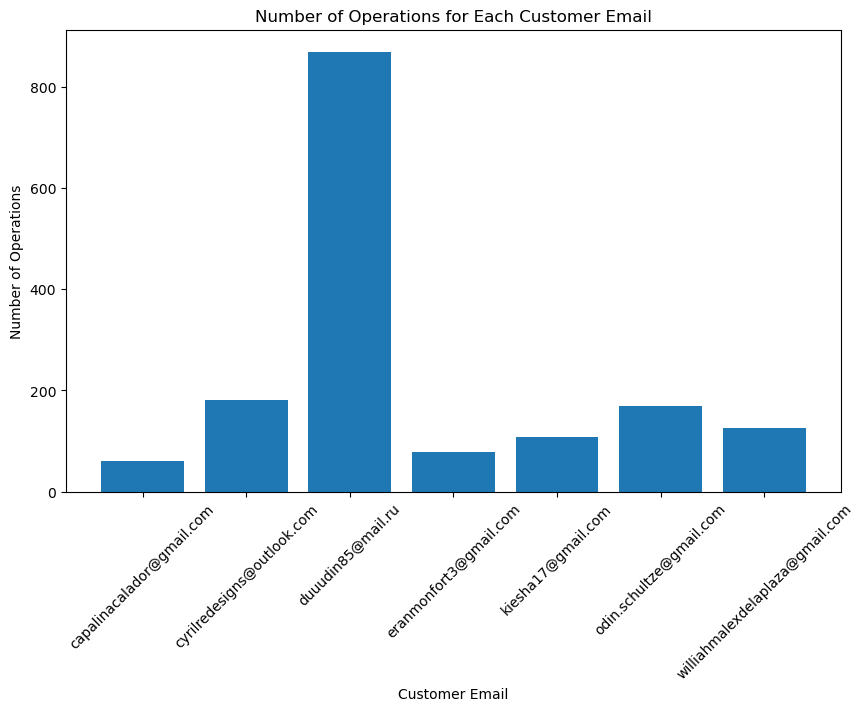

In [192]:
df_filtered = df[df['Customer Email'].isin(['duuudin85@mail.ru', 'capalinacalador@gmail.com', 'eranmonfort3@gmail.com', 'kiesha17@gmail.com', 'williahmalexdelaplaza@gmail.com', 'odin.schultze@gmail.com', 'cyrilredesigns@outlook.com'])]
operations_count = df_filtered[df_filtered['Operation Type'] == 'sale'].groupby('Customer Email').size().reset_index(name='Operations')
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(operations_count['Customer Email'], operations_count['Operations'])
plt.xlabel('Customer Email')
plt.ylabel('Number of Operations')
plt.title('Number of Operations for Each Customer Email')
plt.xticks(rotation=45)
plt.show()